In [2]:
 # pennylane
import pennylane as qml
from pennylane import numpy as np

# dataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage.transform import resize


###**Dataset 1**: Bars and Stripes
https://pennylane.ai/datasets/bars-and-stripes

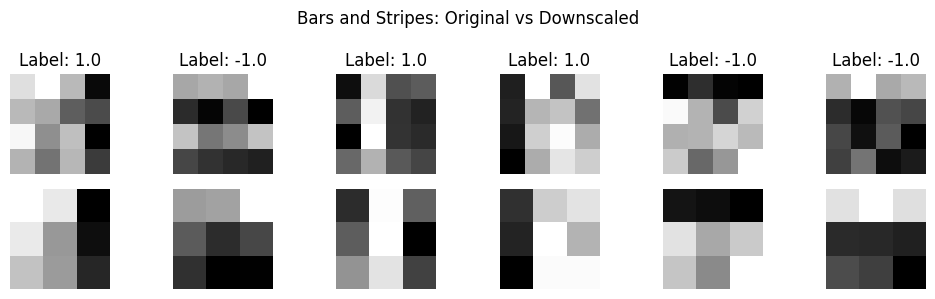

In [5]:

[ds] = qml.data.load("other", name="bars-and-stripes")
X = ds.train['4']['inputs']  
Y = ds.train['4']['labels']  

X_img = np.array([np.reshape(x, (4, 4)) for x in X])

X_small = np.array([resize(img, (3, 3), mode='reflect') for img in X_img])

X_flat = X_small.reshape((X_small.shape[0], -1)) / X_small.max()

fig, axes = plt.subplots(2, 6, figsize=(10, 3))

for i in range(6):
    # Original images
    axes[0, i].imshow(X_img[i], cmap='gray')
    axes[0, i].set_title(f"Label: {Y[i]}")
    axes[0, i].axis('off')

    # Downscaled images
    axes[1, i].imshow(X_small[i], cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("2×2 Downscaled")

plt.suptitle("Bars and Stripes: Original vs Downscaled")
plt.tight_layout()
plt.show()

###**Dataset 2**: load_digits (Similar to MNIST)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits



dataset size:  360


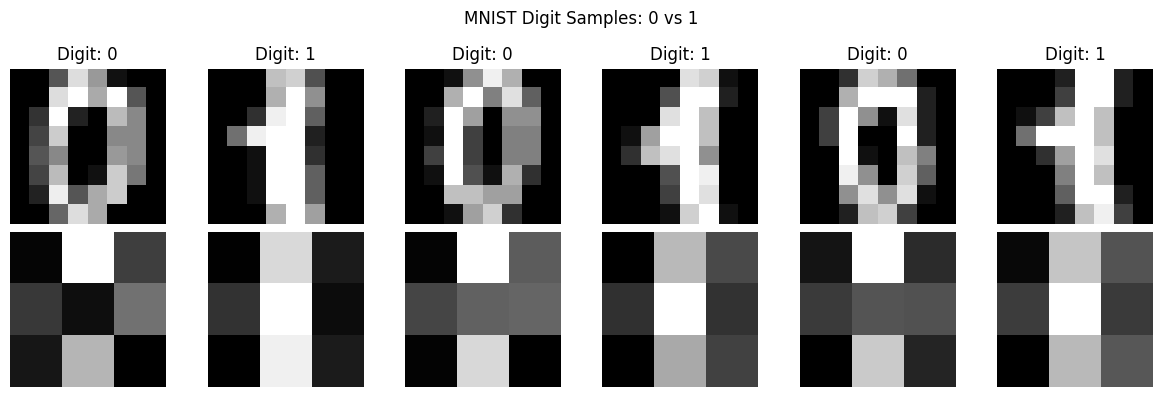

In [ ]:
digits = load_digits()
X_full = digits.images  
y_full = digits.target

# Filter only digits 0 and 1
mask = (y_full == 0) | (y_full == 1)
X_img = X_full[mask]
y = y_full[mask]
print("dataset size: ",len(y))
X_small = np.array([resize(img, (3, 3), mode='reflect') for img in X_img])
X_flat = X_small.reshape((X_small.shape[0], -1)) / X_small.max()
fig, axes = plt.subplots(2, 6, figsize=(12, 4)) 

for i in range(6):
    axes[0, i].imshow(X_img[i], cmap='gray')
    axes[0, i].set_title(f"Digit: {y[i]}")
    axes[0, i].axis('off')

    axes[1, i].imshow(X_small[i], cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("3×3 Downscaled")

plt.suptitle("MNIST Digit Samples: 0 vs 1")
plt.tight_layout()
plt.show()

###**Dataset 3**: Binary Blobs
https://pennylane.ai/datasets/binary-blobs

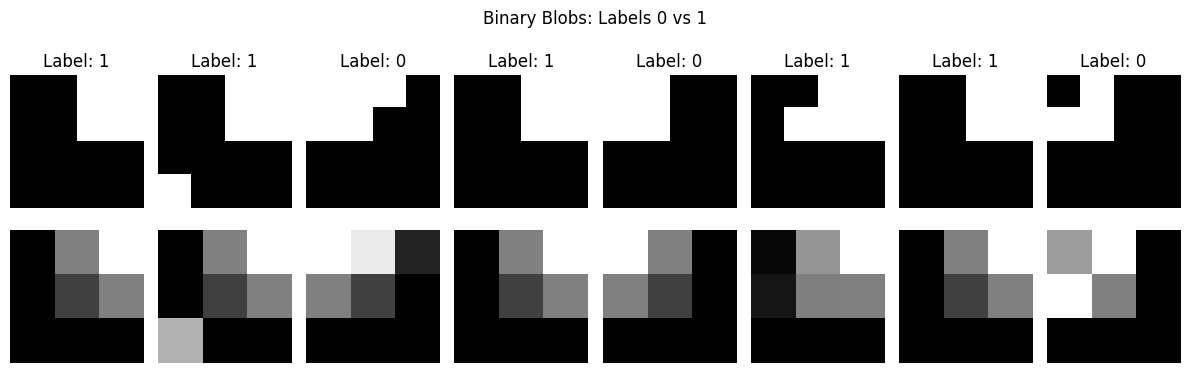

In [4]:
[ds] = qml.data.load("other", name="binary-blobs")

X = ds.train['inputs']  
y = ds.train['labels']

# Filter only labels 0 and 1
mask = (y == 0) | (y == 1)
X_filtered = X[mask]
y_filtered = y[mask]

# Reshape the filtered images to their original 4x4 shape
X_img = np.array([x.reshape(4, 4) for x in X_filtered])

X_small = np.array([resize(img, (3, 3), mode='reflect') for img in X_img])
X_flat = X_small.reshape((X_small.shape[0], -1)) / X_small.max()

fig, axes = plt.subplots(2, 8, figsize=(12, 4)) 

for i in range(8):
    axes[0, i].imshow(X_img[i], cmap='gray')
    axes[0, i].set_title(f"Label: {y_filtered[i]}")
    axes[0, i].axis('off')

    axes[1, i].imshow(X_small[i], cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("3×3 Downscaled")

plt.suptitle("Binary Blobs: Labels 0 vs 1")
plt.tight_layout()
plt.show()